<a href="https://colab.research.google.com/github/gabrielgoncalvess/mvp-analise-de-dados-puc-rio/blob/main/MVP_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O Dataset utilizado foi o "Brazilian E-Commerce Public Dataset by Olist". <br>
Este é um conjunto de dados públicos de comércio eletrônico brasileiro de pedidos feitos na Olist Store. O conjunto de dados contém informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil. Estes são dados comerciais reais, foram anonimizados e as referências às empresas e parceiros no texto da revisão foram substituídas pelos nomes das grandes casas de Game of Thrones. <br>
Disponível no link: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [7]:
# Importação de arquivos
import pandas as pd
df_customers = pd.read_csv("https://raw.githubusercontent.com/gabrielgoncalvess/mvp-analise-de-dados-puc-rio/main/data/olist_customers_dataset.csv")
df_order_items = pd.read_csv("https://raw.githubusercontent.com/gabrielgoncalvess/mvp-analise-de-dados-puc-rio/main/data/olist_order_items_dataset.csv")
df_order_payments = pd.read_csv("https://raw.githubusercontent.com/gabrielgoncalvess/mvp-analise-de-dados-puc-rio/main/data/olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv("https://raw.githubusercontent.com/gabrielgoncalvess/mvp-analise-de-dados-puc-rio/main/data/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("https://raw.githubusercontent.com/gabrielgoncalvess/mvp-analise-de-dados-puc-rio/main/data/olist_orders_dataset.csv")
df_products = pd.read_csv("https://raw.githubusercontent.com/gabrielgoncalvess/mvp-analise-de-dados-puc-rio/main/data/olist_products_dataset.csv")
df_sellers = pd.read_csv("https://raw.githubusercontent.com/gabrielgoncalvess/mvp-analise-de-dados-puc-rio/main/data/olist_sellers_dataset.csv")

# Previsão do Valor Vitalício do Cliente (CLV)

## 1. Descrição do Problema
- **Definição**: Prever o Valor Vitalício (CLV) dos clientes de um e-commerce.
- **Objetivo**: Identificar clientes valiosos para focar em retenção e personalizar estratégias de marketing.

## 2. Tipo de Aprendizado de Máquina
- **Supervisionado**: Problema de regressão para prever um valor contínuo (CLV).

## 3. Premissas ou Hipóteses
- Alta frequência de compra e maiores valores de pedido tendem a indicar um CLV mais elevado.
- Satisfação do cliente, indicada por avaliações positivas, pode estar relacionada a um maior CLV.
- Fatores demográficos e geográficos influenciam o padrão de compras e o CLV.

## 4. Restrições ou Condições para Seleção de Dados
- Dificuldade em prever o CLV para novos clientes sem histórico de compra.
- Influência de mudanças no mercado e no comportamento do consumidor na precisão do modelo.
- Viés potencial nos dados de avaliação.

## 5. Definição dos Atributos do Dataset (Mais detalhes na página do Kaggle)
- **Dados Demográficos (`Customers`)**: Idade, localização, gênero.
- **Histórico de Compras (`Order Items`, `Orders`)**: Frequência, categorias de produtos, valor médio dos pedidos.
- **Dados de Pagamento (`Order Payments`)**: Métodos e total gasto.
- **Feedback do Cliente (`Order Reviews`)**: Notas de avaliação, comentários.
- **Informações de Produto (`Products`)**: Categorias, preços.
- **Dados do Vendedor (`Sellers`)**: Localização, desempenho de envio.
<br> Obs: `Geolocation` não foi utilizado devido à sua granularidade desnecessária

## Modelagem de dados conceitual

<img src="https://raw.githubusercontent.com/gabrielgoncalvess/mvp-analise-de-dados-puc-rio/main/modelagem_conceitual.png">
<img src="https://raw.githubusercontent.com/gabrielgoncalvess/mvp-analise-de-dados-puc-rio/main/schema.png">

# IMPORTANTE: O código abaixo não funciona no Colab, pois não é possível gerar reports por ele, mas estes estão disponíveis na pasta "reports" do GitHub

In [14]:
"""

import os

# Criar pasta chamada "reports" se não existir
os.makedirs('reports', exist_ok=True)

# Agrupamento dos DataFrames em um dicionário
datasets = {
    'Customers': df_customers,
    'Order Items': df_order_items,
    'Order Payments': df_order_payments,
    'Order Reviews': df_order_reviews,
    'Orders': df_orders,
    'Products': df_products,
    'Sellers': df_sellers
}

from ydata_profiling import ProfileReport

# Gerar reports sobre cada tabela
for name, df in datasets.items():
    profile = ProfileReport(df, title=f"YData Profiling Report - {name}", explorative=True)
    report_filename = f'reports/{name}_report.html'
    profile.to_file(report_filename)

"""

'\n\nimport os\n\n# Criar pasta chamada "reports" se não existir\nos.makedirs(\'reports\', exist_ok=True)\n\n# Agrupamento dos DataFrames em um dicionário\ndatasets = {\n    \'Customers\': df_customers,\n    \'Order Items\': df_order_items,\n    \'Order Payments\': df_order_payments,\n    \'Order Reviews\': df_order_reviews,\n    \'Orders\': df_orders,\n    \'Products\': df_products,\n    \'Sellers\': df_sellers\n}\n\nfrom ydata_profiling import ProfileReport\n\n# Gerar reports sobre cada tabela\nfor name, df in datasets.items():\n    profile = ProfileReport(df, title=f"YData Profiling Report - {name}", explorative=True)\n    report_filename = f\'reports/{name}_report.html\'\n    profile.to_file(report_filename)\n\n'

# Resumo dos Conjuntos de Dados

### Após analisar os reports esses foram os principais insights:

## Conjunto de Dados dos Clientes (Customers)
- **Atributos e Instâncias**: 5 atributos, 99441 instâncias.
- **Tipos de Dados**: Principalmente strings (object) e um inteiro (customer_zip_code_prefix).
- **Primeiras Linhas**: Dados incluem ID do cliente, ID único, CEP, cidade e estado.
- **Valores Faltantes**: Não há valores faltantes.

## Conjunto de Dados de Itens de Pedidos (Order Items)
- **Atributos e Instâncias**: 7 atributos, 112650 instâncias.
- **Tipos de Dados**: Combinação de strings (object), inteiros e floats.
- **Primeiras Linhas**: Inclui IDs do pedido e do produto, ID do vendedor, data limite de envio, preço e valor do frete.
- **Valores Faltantes**: Não há valores faltantes.

## Conjunto de Dados de Pagamentos de Pedidos (Order Payments)
- **Atributos e Instâncias**: 5 atributos, 103886 instâncias.
- **Tipos de Dados**: Principalmente inteiros e floats.
- **Primeiras Linhas**: Mostra o ID do pedido, sequencial de pagamento, tipo de pagamento, parcelas e valor do pagamento.
- **Valores Faltantes**: Não há valores faltantes.

## Conjunto de Dados de Avaliações de Pedidos (Order Reviews)
- **Atributos e Instâncias**: 7 atributos, 99224 instâncias.
- **Tipos de Dados**: Principalmente strings (object) e datas.
- **Primeiras Linhas**: Contém ID da avaliação, ID do pedido, nota, título, comentário, data de criação e resposta.
- **Valores Faltantes**: Alguns atributos têm valores faltantes, principalmente comentários.

## Conjunto de Dados de Pedidos (Orders)
- **Atributos e Instâncias**: 8 atributos, 99441 instâncias.
- **Tipos de Dados**: Principalmente datas e strings (object).
- **Primeiras Linhas**: Inclui ID do pedido, ID do cliente, status do pedido, datas (compra, aprovação, envio, entrega, entrega estimada).
- **Valores Faltantes**: Alguns campos relacionados a datas têm valores faltantes.

## Conjunto de Dados de Produtos (Products)
- **Atributos e Instâncias**: 9 atributos, 32951 instâncias.
- **Tipos de Dados**: Combinação de floats e inteiros.
- **Primeiras Linhas**: Mostra ID do produto, categoria, descrição, quantidade de fotos, peso e dimensões.
- **Valores Faltantes**: Alguns atributos, como descrição do produto e quantidade de fotos, têm valores faltantes.

## Conjunto de Dados de Vendedores (Sellers)
- **Atributos e Instâncias**: 4 atributos, 3095 instâncias.
- **Tipos de Dados**: Principalmente strings (object) e um inteiro (seller_zip_code_prefix).
- **Primeiras Linhas**: Inclui ID do vendedor, CEP, cidade e estado.
- **Valores Faltantes**: Não há valores faltantes.

# Resumo Estatístico dos Atributos Numéricos
- **Clientes**: Apenas o CEP é numérico, variando significativamente.
- **Itens de Pedidos**: Preço e valor do frete variam; alguns itens têm preços mais altos e custos de frete.
- **Pagamentos de Pedidos**: Diversos tipos de pagamento e valores, com variação nos valores pagos.
- **Avaliações de Pedidos**: As notas variam, indicando diferentes níveis de satisfação do cliente.
- **Pedidos**: Datas indicam a linha do tempo do processo de pedido.
- **Produtos**: Variação significativa nas dimensões e peso dos produtos.
- **Vendedores**: CEPs indicam uma ampla distribuição geográfica dos vendedores.

# Observações
- **Consistência**: Os dados parecem consistentes, sem discrepâncias óbvias nas primeiras linhas.
- **Valores Faltantes**: Principalmente em avaliações e datas de entrega em Orders. Isso pode ser devido a atrasos na entrega ou falta de feedback dos clientes.
- **Variações nos Dados Numéricos**: Indicam uma ampla gama de produtos, preços, e comportamentos de compra.

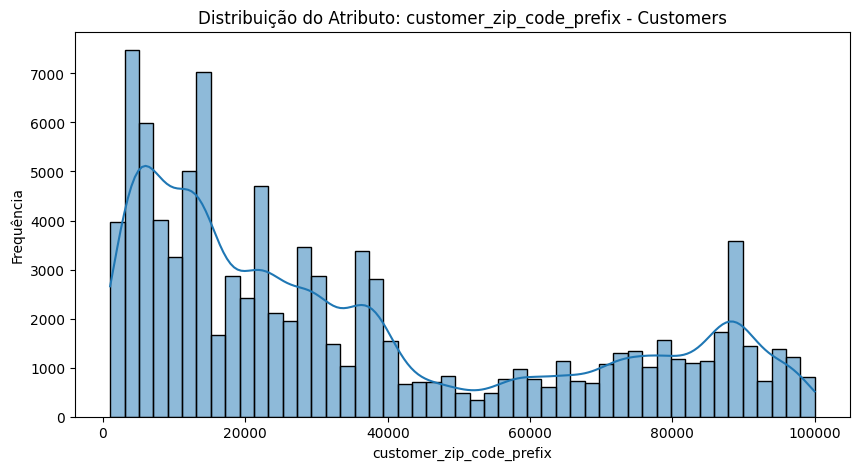

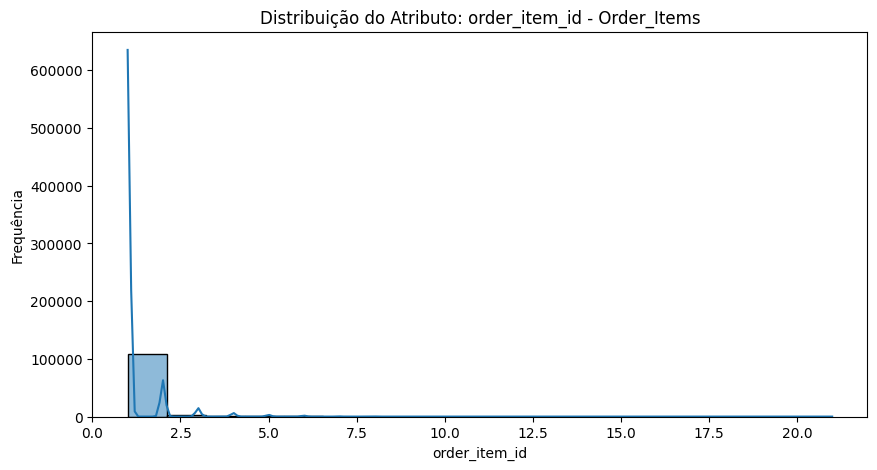

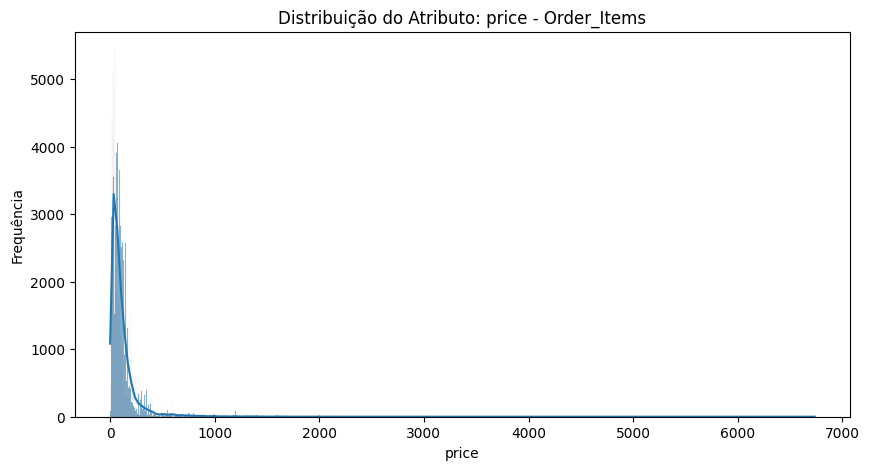

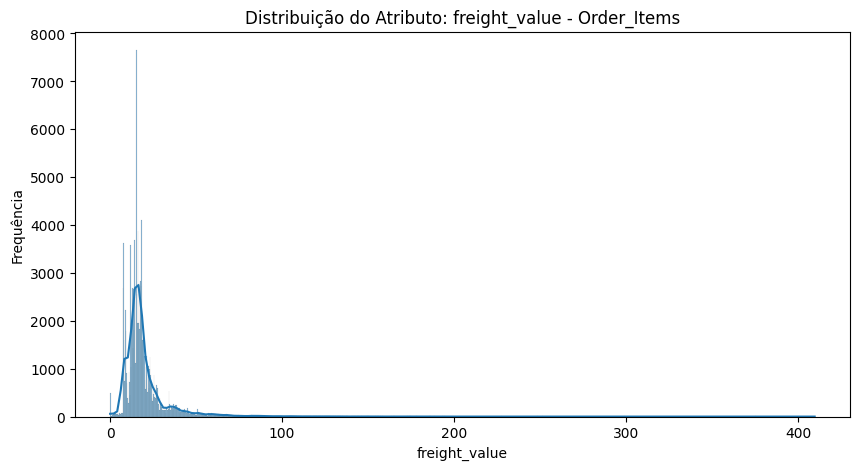

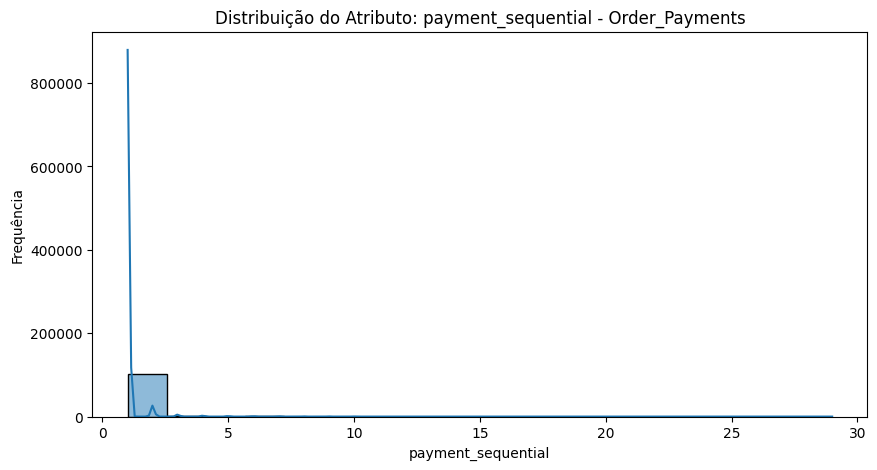

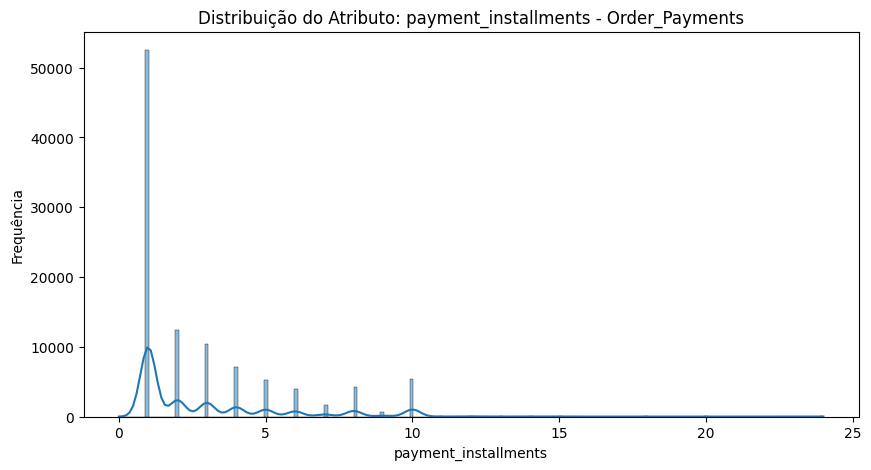

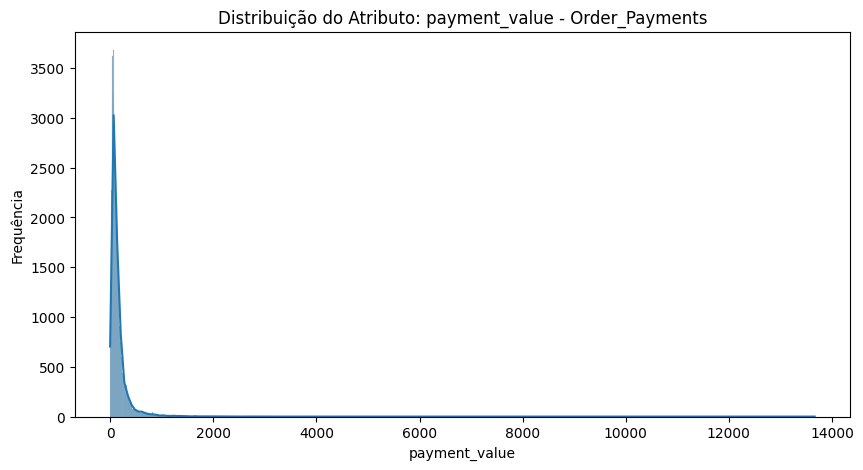

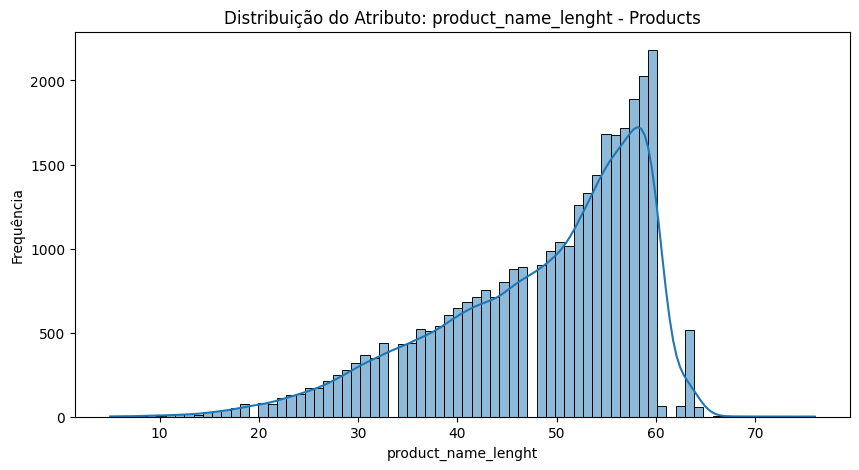

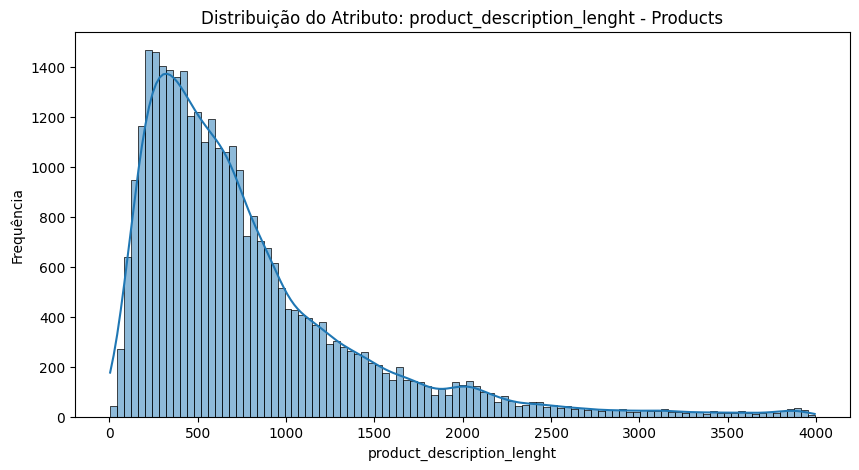

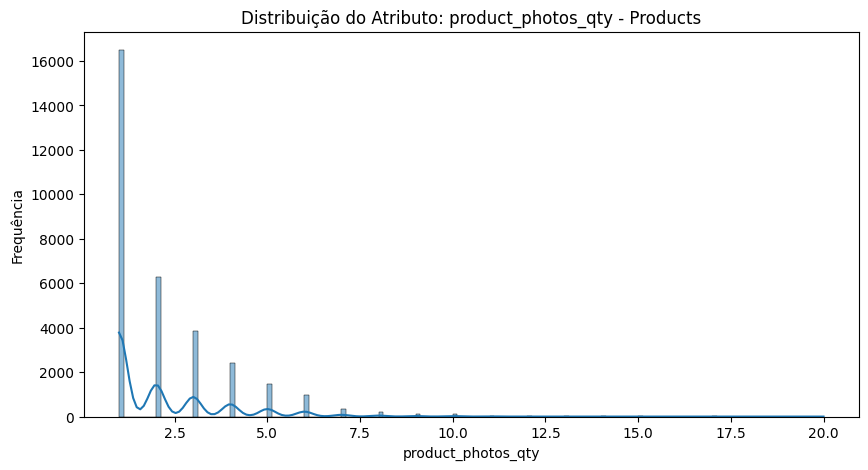

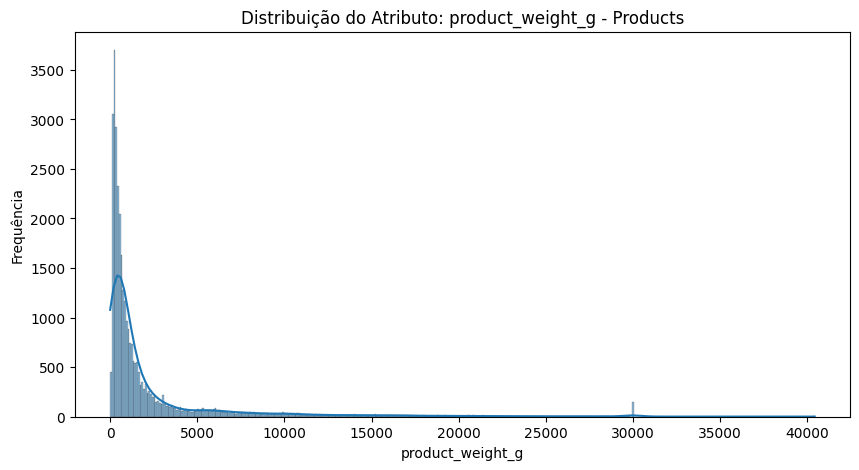

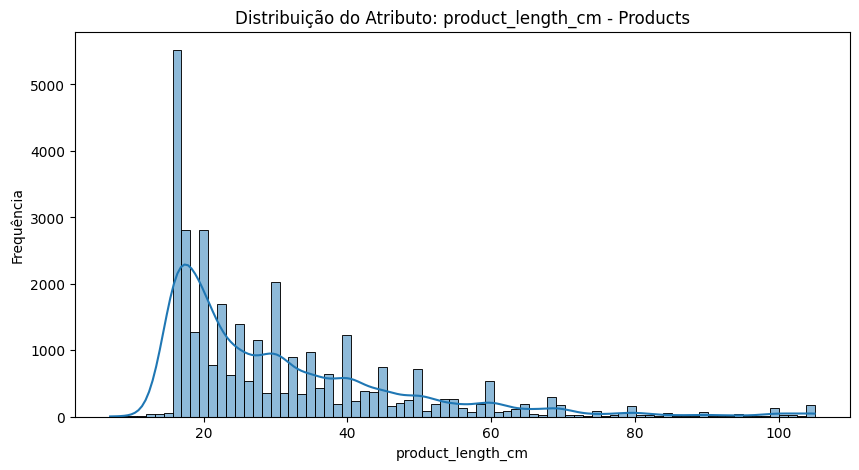

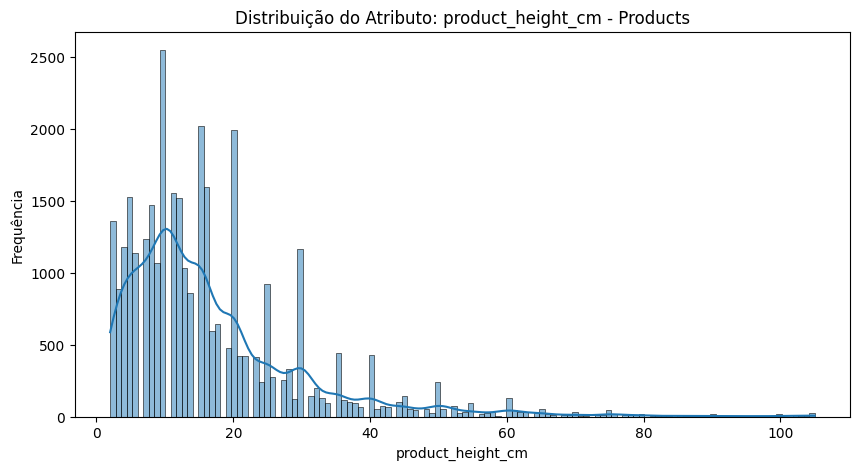

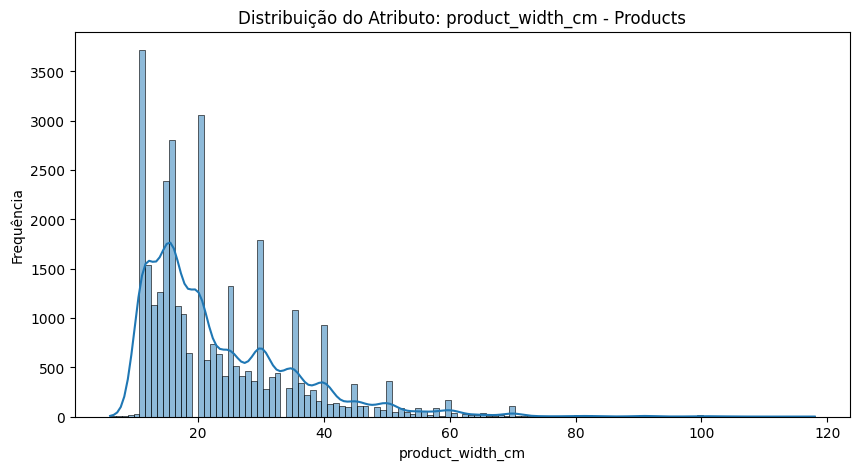

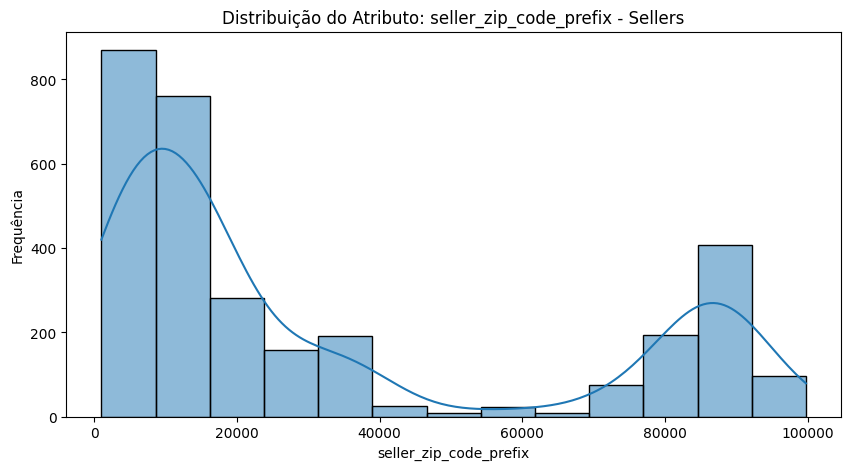

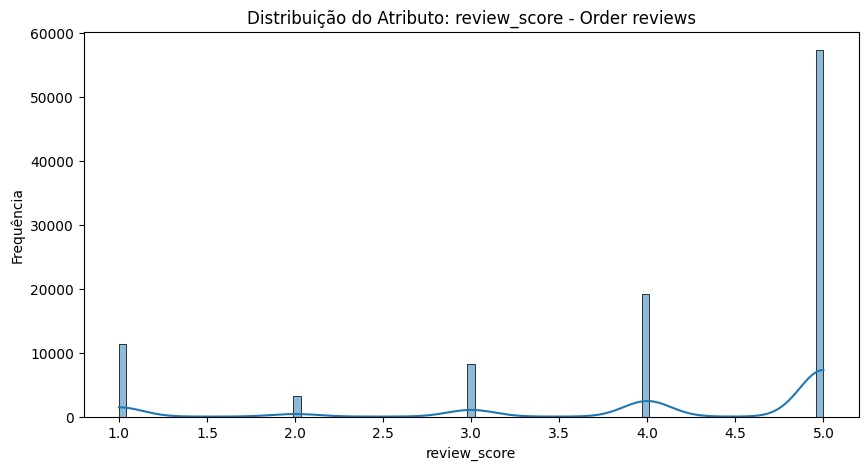

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recriar o dicionário dos conjuntos de dados
datasets = {
    'Customers': df_customers,
    'Order_Items': df_order_items,
    'Order_Payments': df_order_payments,
    'Orders': df_orders,
    'Products': df_products,
    'Sellers': df_sellers,
    'Order reviews': df_order_reviews
}

# Função para plotar a distribuição de cada atributo numérico
def plot_distributions(df_dict):
    for name, df in df_dict.items():
        # Selecionando apenas colunas numéricas
        numeric_columns = df.select_dtypes(include=['float64', 'int64'])
        for column in numeric_columns:
            plt.figure(figsize=(10, 5))
            sns.histplot(numeric_columns[column], kde=True)
            plt.title(f'Distribuição do Atributo: {column} - {name}')
            plt.xlabel(column)
            plt.ylabel('Frequência')
            plt.show()

# Plotando a distribuição de cada atributo numérico dos DataFrames
plot_distributions(datasets)

# Observações das Visualizações dos Datasets

As distribuições de cada atributo numérico dos conjuntos de dados foram plotadas. Abaixo estão algumas observações gerais:

## Customers
- A distribuição do CEP dos clientes (`customer_zip_code_prefix`) mostra uma ampla dispersão geográfica dos clientes.

## Order Items
- O preço (`price`) e o valor do frete (`freight_value`) têm distribuições com caudas longas, sugerindo a presença de preços e custos de frete mais altos para alguns pedidos.

## Order Payments
- Os atributos numéricos como a sequência de pagamento (`payment_sequential`), número de parcelas (`payment_installments`) e valor do pagamento (`payment_value`) mostram que o valor do pagamento varia significativamente, enquanto as sequências de pagamento e as parcelas tendem a ser mais concentradas em valores baixos.

## Orders
- Não foram identificadas colunas numéricas relevantes para visualização neste conjunto de dados.

## Products
- Atributos como peso do produto (`product_weight_g`), e as dimensões (`product_length_cm`, `product_height_cm`, `product_width_cm`) apresentam uma ampla gama de valores.
- Algumas distribuições mostram caudas longas, sugerindo a presença de valores extremos ou outliers que podem precisar de tratamento durante a preparação dos dados.

## Sellers
- A distribuição do CEP do vendedor (`seller_zip_code_prefix`) reflete a localização geográfica dos vendedores, com assimetria que pode indicar uma maior concentração em áreas urbanas.

## Order Reviews
- O atributo numérico principal neste conjunto de dados é a pontuação da avaliação (`review_score`).
- A distribuição da pontuação de avaliação pode nos ajudar a entender a satisfação geral dos clientes. Distribuições fortemente inclinadas para pontuações mais altas podem sugerir uma clientela geralmente satisfeita.
- Valores ausentes em campos de texto como `review_comment_title` e `review_comment_message` podem indicar que nem todos os clientes optam por deixar um comentário detalhado.
- Esses campos de texto podem ser analisados com técnicas de processamento de linguagem natural para extrair insights mais profundos sobre o sentimento do cliente e áreas de melhoria.
- A maior parte das avaliações dos pedidos está concentrada no score 5, o que sugere um alto nível de satisfação dos clientes.
- Existem picos notáveis também nos scores 1 e 4, indicando que há uma quantidade significativa de avaliações negativas e positivas, mas não tão positivas quanto o score 5.
- Os scores intermediários, 2 e 3, são menos frequentes, o que pode indicar que os clientes tendem a dar avaliações extremas (ou seja, muito positivas ou muito negativas).

## Contrução de uma tabela fato

In [16]:
# Para fazer um join entre todas as tabelas e criar uma tabela fato detalhada,
# primeiro é necessário identificar as chaves primárias e estrangeiras que podem ser usadas para os joins. (presente nas modelagens)

# Uma abordagem comum seria começar com a tabela de pedidos e juntá-la com as outras tabelas.
# A tabela 'Orders' pode ser o ponto central, já que cada pedido tem um cliente, pode ter múltiplos itens, pagamentos e avaliações.

# Começando com a tabela 'Orders' e fazendo joins com as outras tabelas usando as chaves apropriadas.

# Fazer os joins
# 'orders' e 'customers'
orders_customers_df = pd.merge(df_orders, df_customers, on='customer_id', how='left')

# Juntando com 'order_items'
orders_customers_items_df = pd.merge(orders_customers_df, df_order_items, on='order_id', how='left')

# Juntando 'order_payments'
orders_full_df = pd.merge(orders_customers_items_df, df_order_payments, on='order_id', how='left')

# Juntando 'order_reviews'
orders_full_df = pd.merge(orders_full_df, df_order_reviews, on='order_id', how='left')

# Juntando 'products'
orders_full_df = pd.merge(orders_full_df, df_products, on='product_id', how='left')

# Juntando 'sellers'
orders_full_df = pd.merge(orders_full_df, df_sellers, on='seller_id', how='left')

# Depois de todos os joins, é necessário definir quais colunas manter.
# Isso depende do propósito da análise. Por exemplo, se for interessante analisar o comportamento do cliente,
# pode-se descartar algumas das colunas técnicas como 'shipping_limit_date' ou 'product_photos_qty'.

# Mantendo as colunas que podem ser úteis para uma análise ampla de vendas e comportamento do cliente.

columns_to_keep = [
    'order_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state',
    'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date',
    'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
    'payment_sequential', 'payment_type', 'payment_installments', 'payment_value',
    'review_id', 'review_score', 'review_comment_title', 'review_comment_message',
    'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix', 'seller_city', 'seller_state'
]

# Filtrando a tabela fato para manter apenas as colunas selecionadas
tabela_fato = orders_full_df[columns_to_keep]

# Agora, tem-se uma tabela fato detalhada com as informações relevantes de todas as tabelas
tabela_fato.head()

,order_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,utilidades_domesticas,40.0,268.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,utilidades_domesticas,40.0,268.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,utilidades_domesticas,40.0,268.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,...,perfumaria,29.0,178.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,...,automotivo,46.0,232.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP


# Colunas Relevantes para a Previsão do Valor Vitalício do Cliente (CLV)

Para realizar a Previsão do CLV, as seguintes colunas são consideradas relevantes:

## Comportamento de Compra do Cliente
- **Dados Históricos de Compra**: Quantidade de pedidos, frequência de compras, recência (quão recentemente uma compra foi feita), e valor monetário das compras (por exemplo, `price` e `freight_value`).
- **Detalhes do Pedido**: Data da compra (`order_purchase_timestamp`), que pode ser usada para calcular a recência e a frequência das compras.

## Valor Financeiro
- **Transações**: Valores de pagamento (`payment_value`), tipos de pagamento (`payment_type`), e parcelamento (`payment_installments`), pois podem refletir a capacidade e preferência de gasto do cliente.

## Satisfação e Engajamento do Cliente
- **Dados de Avaliação**: Score de avaliação (`review_score`), que pode ser um indicador de satisfação do cliente e, por extensão, influenciar a fidelidade e o valor do cliente a longo prazo.

## Dados Demográficos
- **Informações do Cliente**:  CEP (`customer_zip_code_prefix`), cidade (`customer_city`), e estado (`customer_state`), que podem ser utilizados para segmentação geográfica e análises de tendências de compra.

## Informações Logísticas
- **Detalhes do Frete**:  Valor do frete (`freight_value`), pois custos mais altos podem afetar a satisfação e a frequência de compra.
- **Tempo de Entrega**:  Datas relacionadas à entrega (por exemplo, `order_delivered_customer_date`), pois atrasos podem afetar a experiência do cliente.

## Categoria do Produto
- **Categoria**: Nome da categoria do produto (`product_category_name`), que pode influenciar a frequência de compras dependendo da natureza do produto.

A remoção de colunas menos relevantes pode ajudar a reduzir a complexidade do modelo e evitar overfitting. Por exemplo, identificadores únicos como `order_id`, `customer_id`, e `review_id` não são úteis para a modelagem do CLV e podem ser removidos após a consolidação das informações relevantes. Da mesma forma, informações sobre a descrição do produto ou o comprimento do nome do produto (`product_name_lenght`, `product_description_lenght`) são menos prováveis de influenciar o CLV e podem ser omitidas, a menos que o foco seja na análise de sentimentos ou em outro tipo de análise de texto.

In [17]:
colunas_relevantes = [
    'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state',
    'order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
    'payment_installments', 'payment_value', 'review_score',
    'product_category_name', 'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm', 'price', 'freight_value'
]

# Filtro aplicado para selecionar apenas as colunas relevantes
tabela_fato = tabela_fato[colunas_relevantes]

In [18]:
tabela_fato

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,freight_value
0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,4.0,utilidades_domesticas,500.0,19.0,8.0,13.0,29.99,8.72
1,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,4.0,utilidades_domesticas,500.0,19.0,8.0,13.0,29.99,8.72
2,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,4.0,utilidades_domesticas,500.0,19.0,8.0,13.0,29.99,8.72
3,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,4.0,perfumaria,400.0,19.0,13.0,19.0,118.70,22.76
4,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,5.0,automotivo,420.0,24.0,19.0,21.0,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,credit_card,3.0,195.00,4.0,bebes,4950.0,40.0,10.0,40.0,174.90,20.10
119139,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,credit_card,5.0,271.01,5.0,eletrodomesticos_2,13300.0,32.0,90.0,22.0,205.99,65.02
119140,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,credit_card,4.0,441.16,2.0,informatica_acessorios,6550.0,20.0,20.0,20.0,179.99,40.59
119141,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,credit_card,4.0,441.16,2.0,informatica_acessorios,6550.0,20.0,20.0,20.0,179.99,40.59


In [ ]:
# Salvar tabela fato
tabela_fato.to_csv('tabela_fato.csv', index=False)

In [19]:
# Tratar Valores Faltantes:
# Substituir os valores numéricos faltantes pela média e os categóricos pela moda.
for column in tabela_fato.columns:
    if tabela_fato[column].dtype in ['int64', 'float64']:
        tabela_fato[column].fillna(tabela_fato[column].mean(), inplace=True)
    else:
        tabela_fato[column].fillna(tabela_fato[column].mode()[0], inplace=True)

# Normalização dos Dados Numéricos:
# Aplicar uma normalização aos dados numéricos para que tenham uma escala comum, utilizando MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns = tabela_fato.select_dtypes(include=['int64', 'float64']).columns
tabela_fato[numeric_columns] = scaler.fit_transform(tabela_fato[numeric_columns])

# One-hot Encoding para Dados Categóricos:
# Converter variáveis categóricas em um formato numérico que possa ser utilizado por algoritmos de machine learning.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=True, drop='first')
onehot = encoder.fit_transform(tabela_fato)
print(onehot)

# Salvar Visões Diferentes do Dataset:
# Após as transformações, salvar o dataset pré-processado para análises futuras.
tabela_fato.to_csv('tabela_fato_pre-processada.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


  (0, 46727)	1.0
  (0, 97013)	1.0
  (0, 114684)	1.0
  (0, 115230)	1.0
  (0, 142832)	1.0
  (0, 241013)	1.0
  (0, 330711)	1.0
  (0, 400712)	1.0
  (0, 400988)	1.0
  (0, 400992)	1.0
  (0, 402276)	1.0
  (0, 430095)	1.0
  (0, 430169)	1.0
  (0, 430555)	1.0
  (0, 432385)	1.0
  (0, 432478)	1.0
  (0, 432581)	1.0
  (0, 433469)	1.0
  (0, 439269)	1.0
  (1, 46727)	1.0
  (1, 97013)	1.0
  (1, 114684)	1.0
  (1, 115230)	1.0
  (1, 142832)	1.0
  (1, 241013)	1.0
  :	:
  (119141, 431712)	1.0
  (119141, 432386)	1.0
  (119141, 432491)	1.0
  (119141, 432588)	1.0
  (119141, 436368)	1.0
  (119141, 442392)	1.0
  (119142, 36266)	1.0
  (119142, 109085)	1.0
  (119142, 113158)	1.0
  (119142, 115222)	1.0
  (119142, 176293)	1.0
  (119142, 271698)	1.0
  (119142, 361237)	1.0
  (119142, 400821)	1.0
  (119142, 400989)	1.0
  (119142, 400992)	1.0
  (119142, 408441)	1.0
  (119142, 430097)	1.0
  (119142, 430108)	1.0
  (119142, 430243)	1.0
  (119142, 432382)	1.0
  (119142, 432477)	1.0
  (119142, 432583)	1.0
  (119142, 434517)	1